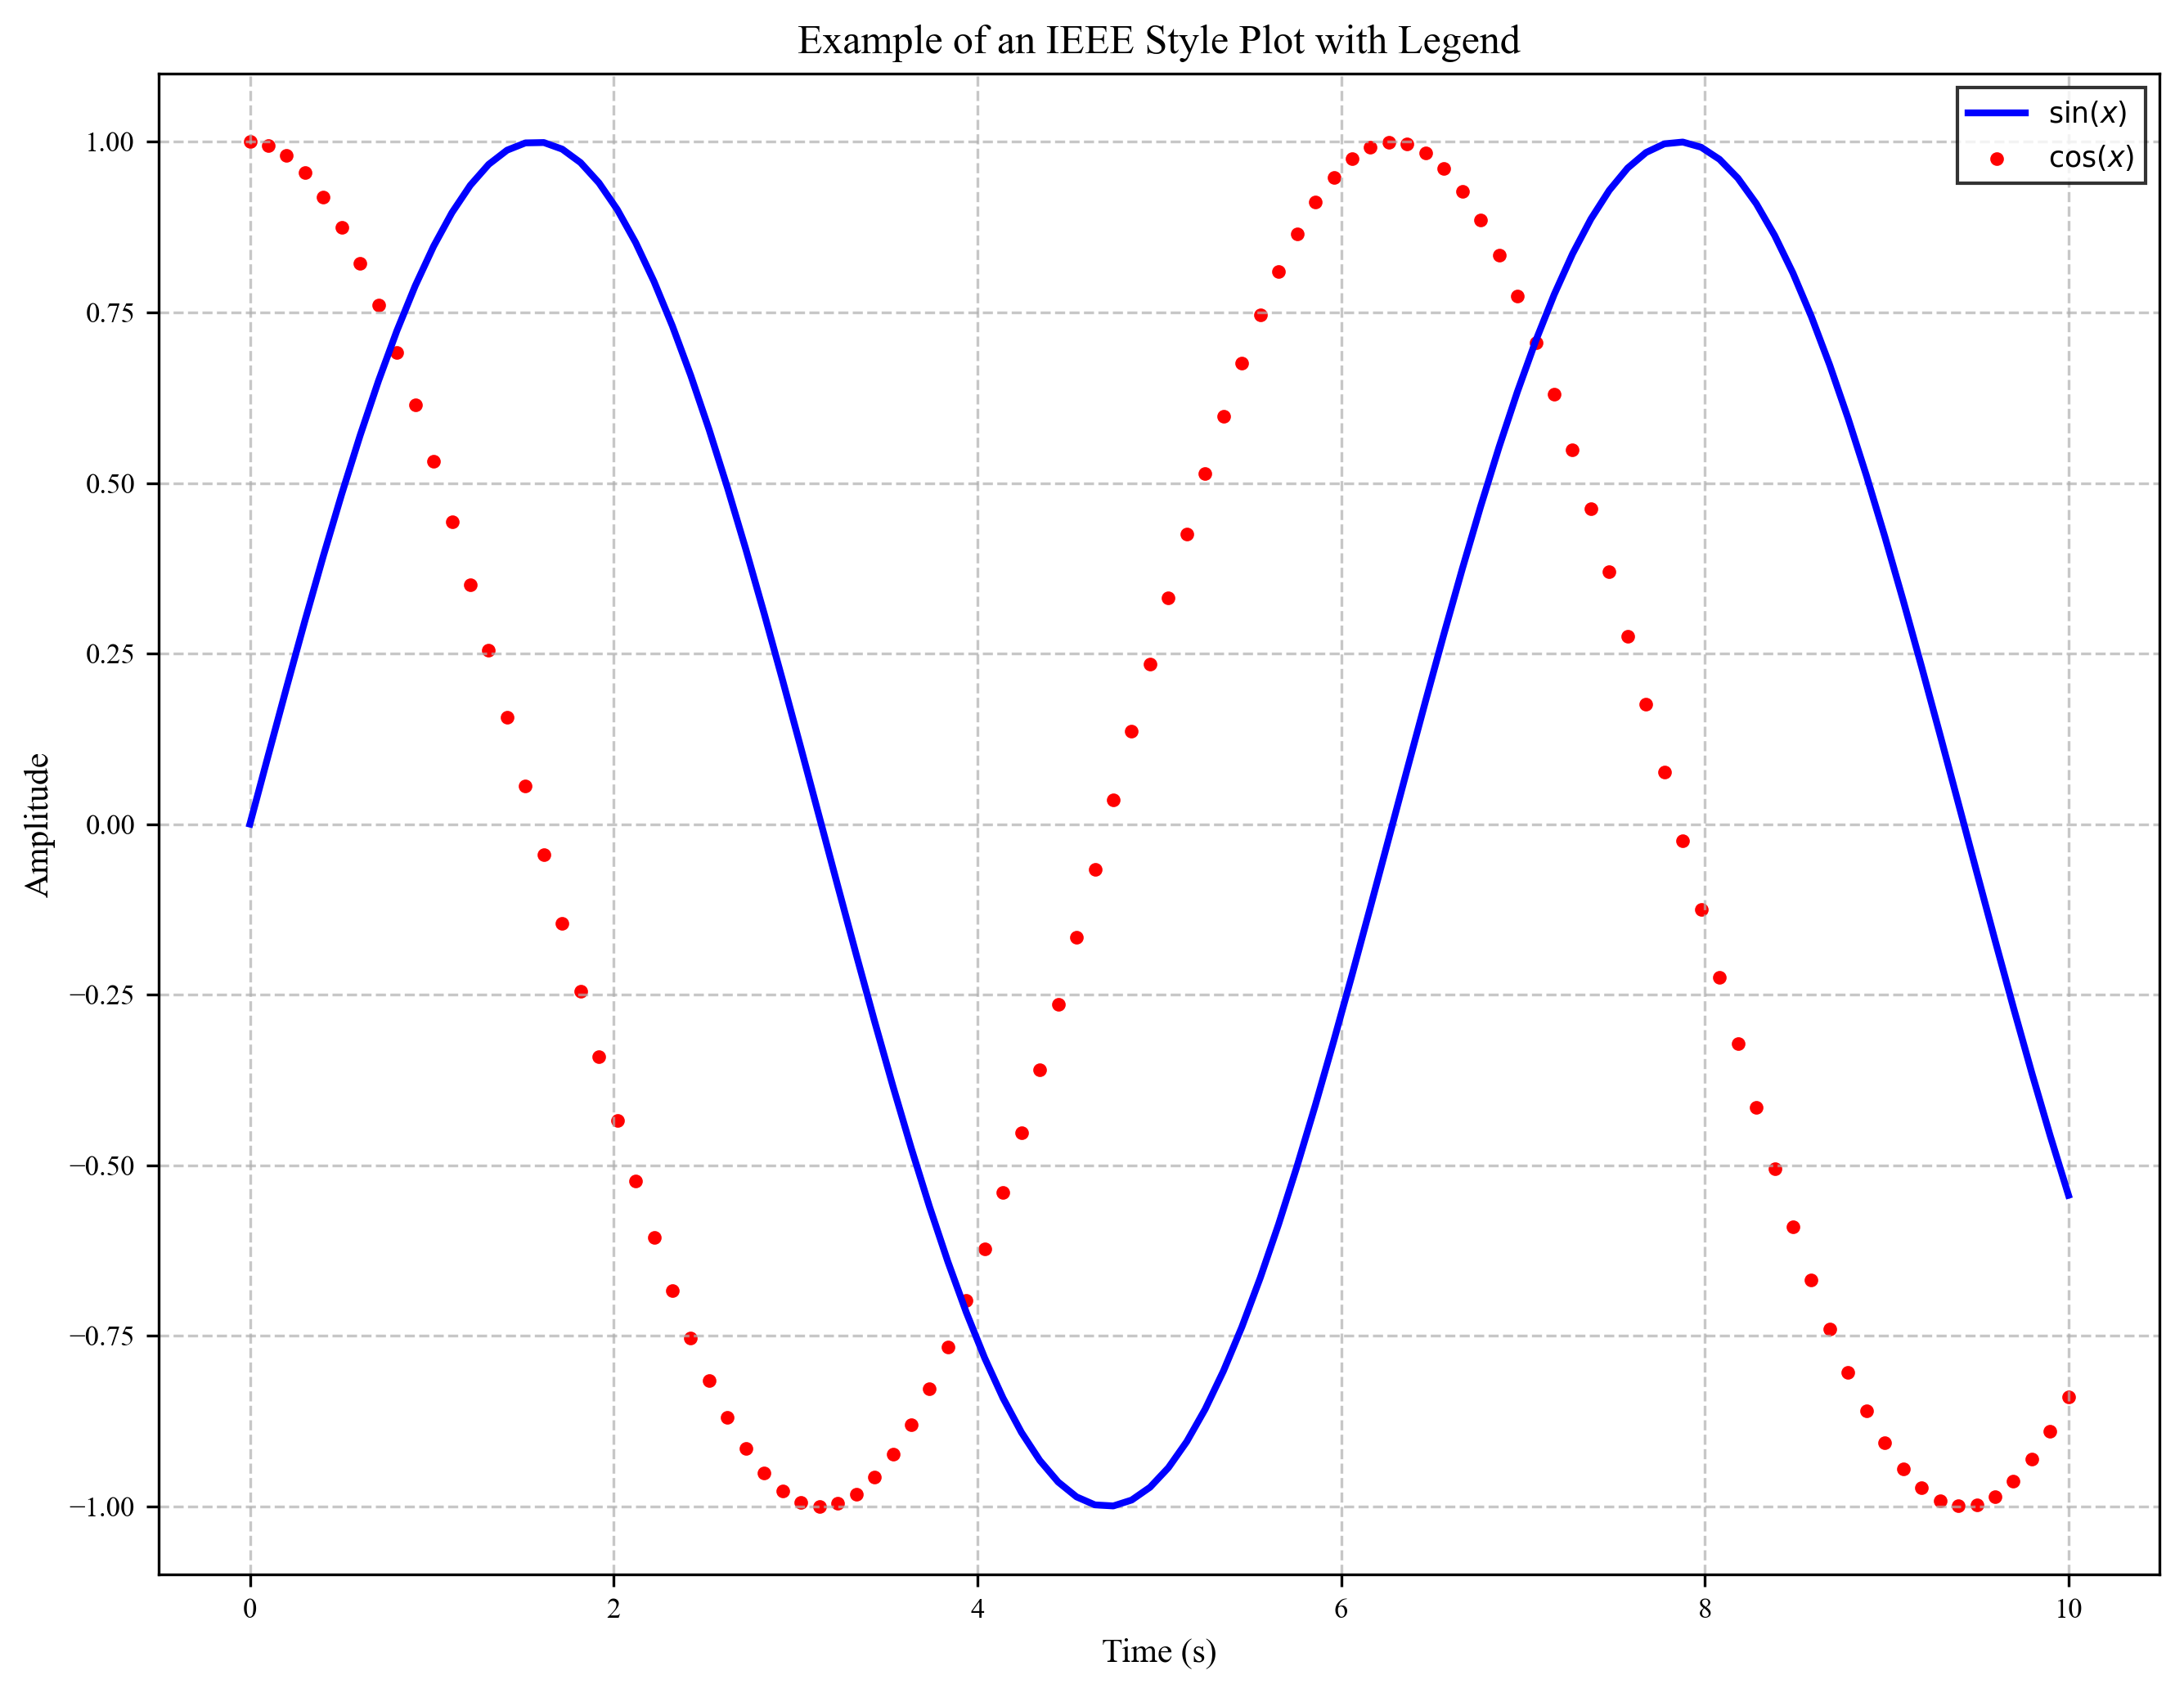

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# 设置字体为 Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
# 设置字体大小和其他样式选项
plt.rcParams.update({
    'font.size': 10,
    'font.family':'serif',
    'font.serif':'Times New Roman',
    'text.usetex': False,  # 如果你的系统安装了LaTeX，并且你想使用它来渲染文本，可以设置为True
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'figure.figsize': (9, 7),  # 设置图表尺寸
    'figure.dpi': 300,  # 设置分辨率
    'axes.labelsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.fontsize': 'small',
})

# 示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 创建一个新的图表
fig, ax = plt.subplots()
# 绘制数据
ax.plot(x, y1, label=r'$\sin(x)$', color='blue')
ax.scatter(x, y2, label=r'$\cos(x)$', color='red',marker='.')

# 添加标题和轴标签
ax.set_title('Example of an IEEE Style Plot with Legend')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

# 添加图例
ax.legend(loc='upper right',edgecolor="black",frameon=True,fancybox=False)

# 显示网格
ax.grid(True, linestyle='--', alpha=0.7)

# 调整边距
plt.tight_layout()

# 显示图表
plt.show()

Bennett的高斯模型并不是一个广泛认可的标准模型来描述丢包率与链路带宽利用率之间的关系。可能是我之前提供的信息有所混淆。实际上，关于丢包率与带宽利用率之间的关系并没有一个名为"Bennett的高斯模型"的具体模型。

然而，在网络工程领域，确实存在一些基于高斯分布或其他统计分布的模型来描述网络性能指标，如丢包率。如果我们要构建一个类似的简化模型来描述丢包率（PLR）与带宽利用率（LU）之间的关系，可能会借鉴高斯分布的概念来构建一个概率模型。

一个可能的简化模型可能是这样的：

$$ \text{PLR}(LU) = Q\left(\frac{LU - T}{\sigma}\right) $$

其中：
- $ \text{PLR}(LU) $表示给定带宽利用率 $ LU $下的丢包率。
- $ T $是阈值，超过这个阈值后丢包开始发生。
- $ \sigma $是标准差，反映了丢包率随带宽利用率变化的速度。
- $ Q(x) $是Q函数，定义为 $ Q(x) = \frac{1}{\sqrt{2\pi}}\int_x^\infty e^{-t^2/2}dt $，表示标准化高斯分布的尾部概率。

这个公式试图描述当带宽利用率超过某一阈值后，丢包率开始增加的情况。$ Q(x) $函数的使用意味着丢包率的增长是非线性的，并且随着带宽利用率越接近甚至超过网络容量，丢包率增长得更快。

请注意，这只是一个示例模型，实际上在设计此类模型时，需要根据具体的网络环境、硬件性能、流量类型等因素进行调整。此外，实际应用中可能会使用更为复杂的方法来预测丢包率，例如基于实际测量数据的统计分析或利用机器学习技术建立预测模型。在撰写学术论文时，应该参考最新的研究成果，并且验证所使用的模型是否适用于特定的网络环境。

In [8]:
import numpy as np
from scipy.stats import norm


def PLR(lu, threshold=0.8, sigma=0.1):
    """
    计算给定带宽利用率下的丢包率(packet loss rate)。
    
    参数:
        lu (float): 带宽利用率。
        threshold (float): 阈值，超过这个阈值后丢包开始显著增加，默认为 0.7。
        sigma (float): 标准差，默认为 0.1。
        
    返回:
        float: 丢包率。
    """
    # Q函数计算尾部概率
    q_value = norm.sf((lu - threshold) / sigma)
    return q_value

# 示例使用
threshold = 0.8  # 当带宽利用率超过70%时，丢包率开始显著增加
sigma = 0.1      # 控制丢包率随带宽利用率变化的速率

# 测试不同的带宽利用率
lus = [0.65, 0.75, 0.85, 0.95]
for lu in lus:
    print(f"带宽利用率 {lu:.1f}: 丢包率 {PLR(lu, threshold, sigma):.4f}")

带宽利用率 0.7: 丢包率 0.9332
带宽利用率 0.8: 丢包率 0.6915
带宽利用率 0.8: 丢包率 0.3085
带宽利用率 0.9: 丢包率 0.0668


链路延迟（Latency）与带宽利用率（Utilization）之间的关系可以受到多种因素的影响，包括但不限于网络拥塞、队列长度、数据包处理时间等。链路延迟通常指的是数据包从源端到目的端所需的时间，它包括传输延迟、传播延迟、处理延迟以及排队延迟等组成部分。

在简化的情况下，链路延迟与带宽利用率之间的关系可以通过一些经验公式或模型来近似描述。一种常用的方法是使用吉尔伯特-埃尔曼模型（Gilbert-Ellman model）或类似的模型来估计拥塞情况下的延迟。

### 吉尔伯特-埃尔曼模型

吉尔伯特-埃尔曼模型假设网络中的延迟主要由排队延迟引起，并且随着带宽利用率的增加，排队延迟会显著增加。该模型的一个简化版本可以如下表述：

$ L = L_0 + \frac{b}{1 - U} $

其中：
- $ L $ 是总的链路延迟。
- $ L_0 $ 是基本延迟（不包括排队延迟），它包含了传播延迟、处理延迟等固定延迟成分。
- $ b $ 是与排队延迟相关的参数，通常与链路的队列长度和数据包大小有关。
- $ U $ 是带宽利用率。

### 解释

- **基本延迟 $ L_0 $**：即使在网络不拥挤的情况下，也存在一定的固有延迟，如数据包的传输时间、物理距离引起的传播延迟以及路由器或交换机处理数据包的时间。
- **排队延迟**：当带宽利用率 $ U $ 接近 1 时，排队延迟会迅速增加。这是因为随着带宽利用率的提高，数据包在路由器或交换机的队列中等待的时间变长，从而增加了总的延迟。




In [9]:
def link_latency(bandwidth_utilization, base_latency, queue_delay_factor):
    """
    计算链路延迟。
    
    参数:
        bandwidth_utilization (float): 带宽利用率，介于0和1之间。
        base_latency (float): 基本延迟（不含排队延迟）。
        queue_delay_factor (float): 与排队延迟相关的参数。
        
    返回:
        float: 总的链路延迟。
    """
    if bandwidth_utilization >= 1.0:
        raise ValueError("带宽利用率必须小于1")
    
    latency = base_latency + queue_delay_factor / (1 - bandwidth_utilization)
    return latency

# 示例使用
base_latency = 10  # 假设基本延迟为10毫秒
queue_delay_factor = 50  # 假设排队延迟因子为50
bandwidth_utilizations = [0.5, 0.7, 0.9, 0.99]

for u in bandwidth_utilizations:
    print(f"带宽利用率 {u:.2f}: 链路延迟 {link_latency(u, base_latency, queue_delay_factor):.2f} ms")

带宽利用率 0.50: 链路延迟 110.00 ms
带宽利用率 0.70: 链路延迟 176.67 ms
带宽利用率 0.90: 链路延迟 510.00 ms
带宽利用率 0.99: 链路延迟 5010.00 ms


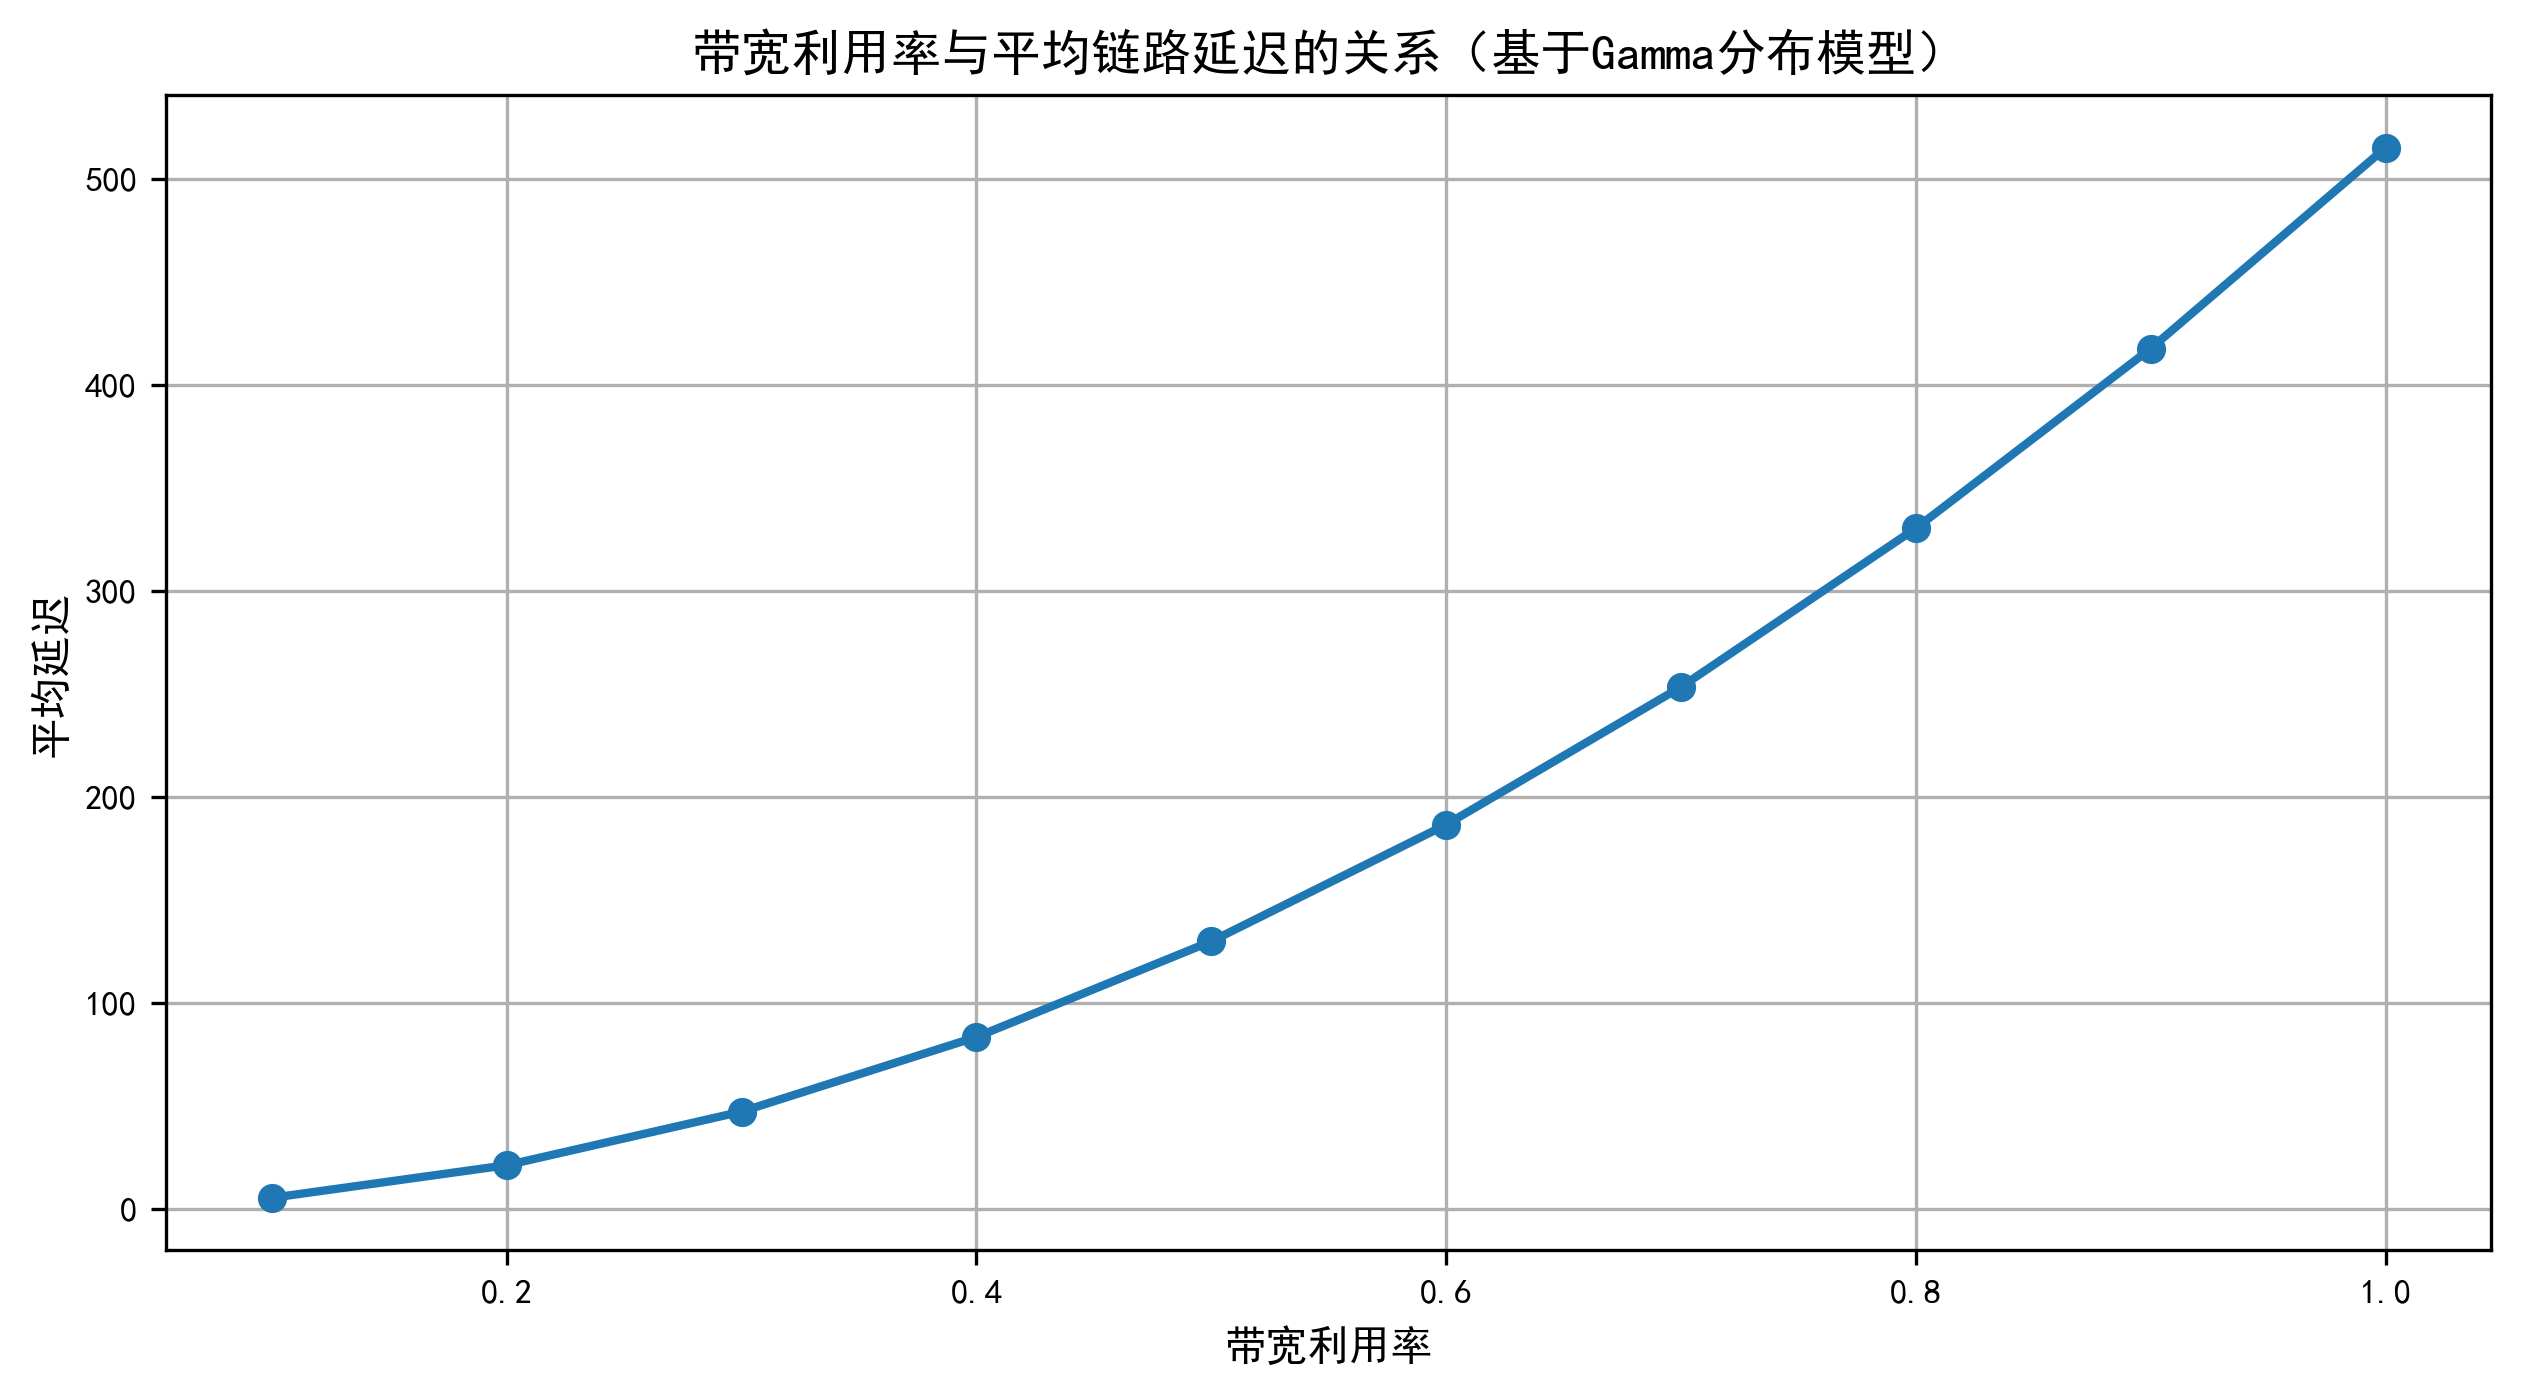

带宽利用率 0.1: 平均延迟 5.61
带宽利用率 0.2: 平均延迟 21.42
带宽利用率 0.30000000000000004: 平均延迟 47.430000000000014
带宽利用率 0.4: 平均延迟 83.64000000000001
带宽利用率 0.5: 平均延迟 130.05
带宽利用率 0.6: 平均延迟 186.65999999999997
带宽利用率 0.7000000000000001: 平均延迟 253.47000000000003
带宽利用率 0.8: 平均延迟 330.48
带宽利用率 0.9: 平均延迟 417.69000000000005
带宽利用率 1.0: 平均延迟 515.1


In [2]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 配置中文字体
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
# 设置字体为 Times New Roman
plt.rcParams['font.serif'] = 'Times New Roman'
# 设置字体大小和其他样式选项
plt.rcParams.update({
    'font.size': 10,
    'font.family':'SimHei',
    'font.serif':'Times New Roman',
    'text.usetex': False,  # 如果你的系统安装了LaTeX，并且你想使用它来渲染文本，可以设置为True
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'figure.figsize': (9, 7),  # 设置图表尺寸
    'figure.dpi': 300,  # 设置分辨率
    'axes.labelsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.fontsize': 'small',
})

def gamma_delay_model(bandwidth_utilization, shape_factor=2, scale_factor=255):
    """
    使用Gamma分布建模链路延迟.
    
    参数:
    bandwidth_utilization : float
        带宽利用率（介于0到1之间）.
    shape_factor : float
        影响形状参数的基本因子.
    scale_factor : float
        影响尺度参数的基本因子.
        
    返回:
    scipy.stats.gamma对象
        使用Gamma分布参数化的延迟模型.
    """
    # 假设形状参数和带宽利用率正相关
    alpha = shape_factor*bandwidth_utilization
    # # 假设尺度参数和带宽利用率负相关
    beta = scale_factor * (bandwidth_utilization + 0.01)  # 避免除以零
    return gamma(a=alpha, scale=beta)

# 设置带宽利用率的范围
utilizations = np.linspace(0.1, 1.0, 10)

# 初始化存储平均延迟的列表
average_delays = []

# 对每种带宽利用率进行模拟
for utilization in utilizations:
    model = gamma_delay_model(utilization)
    # 计算平均延迟
    mean_delay = model.mean()
    average_delays.append(mean_delay)

# 绘制带宽利用率与平均延迟的关系图
plt.figure(figsize=(10, 5))
plt.plot(utilizations, average_delays, marker='o')
plt.title('带宽利用率与平均链路延迟的关系（基于Gamma分布模型）')
plt.xlabel('带宽利用率')
plt.ylabel('平均延迟')
plt.grid(True)
plt.show()

# 输出每种带宽利用率下的平均延迟
for i, utilization in enumerate(utilizations):
    print(f"带宽利用率 {utilization}: 平均延迟 {average_delays[i]}")

拟合得到的形状参数 alpha: 2.0326766255259323
拟合得到的尺度参数 theta: 249.05469554133396


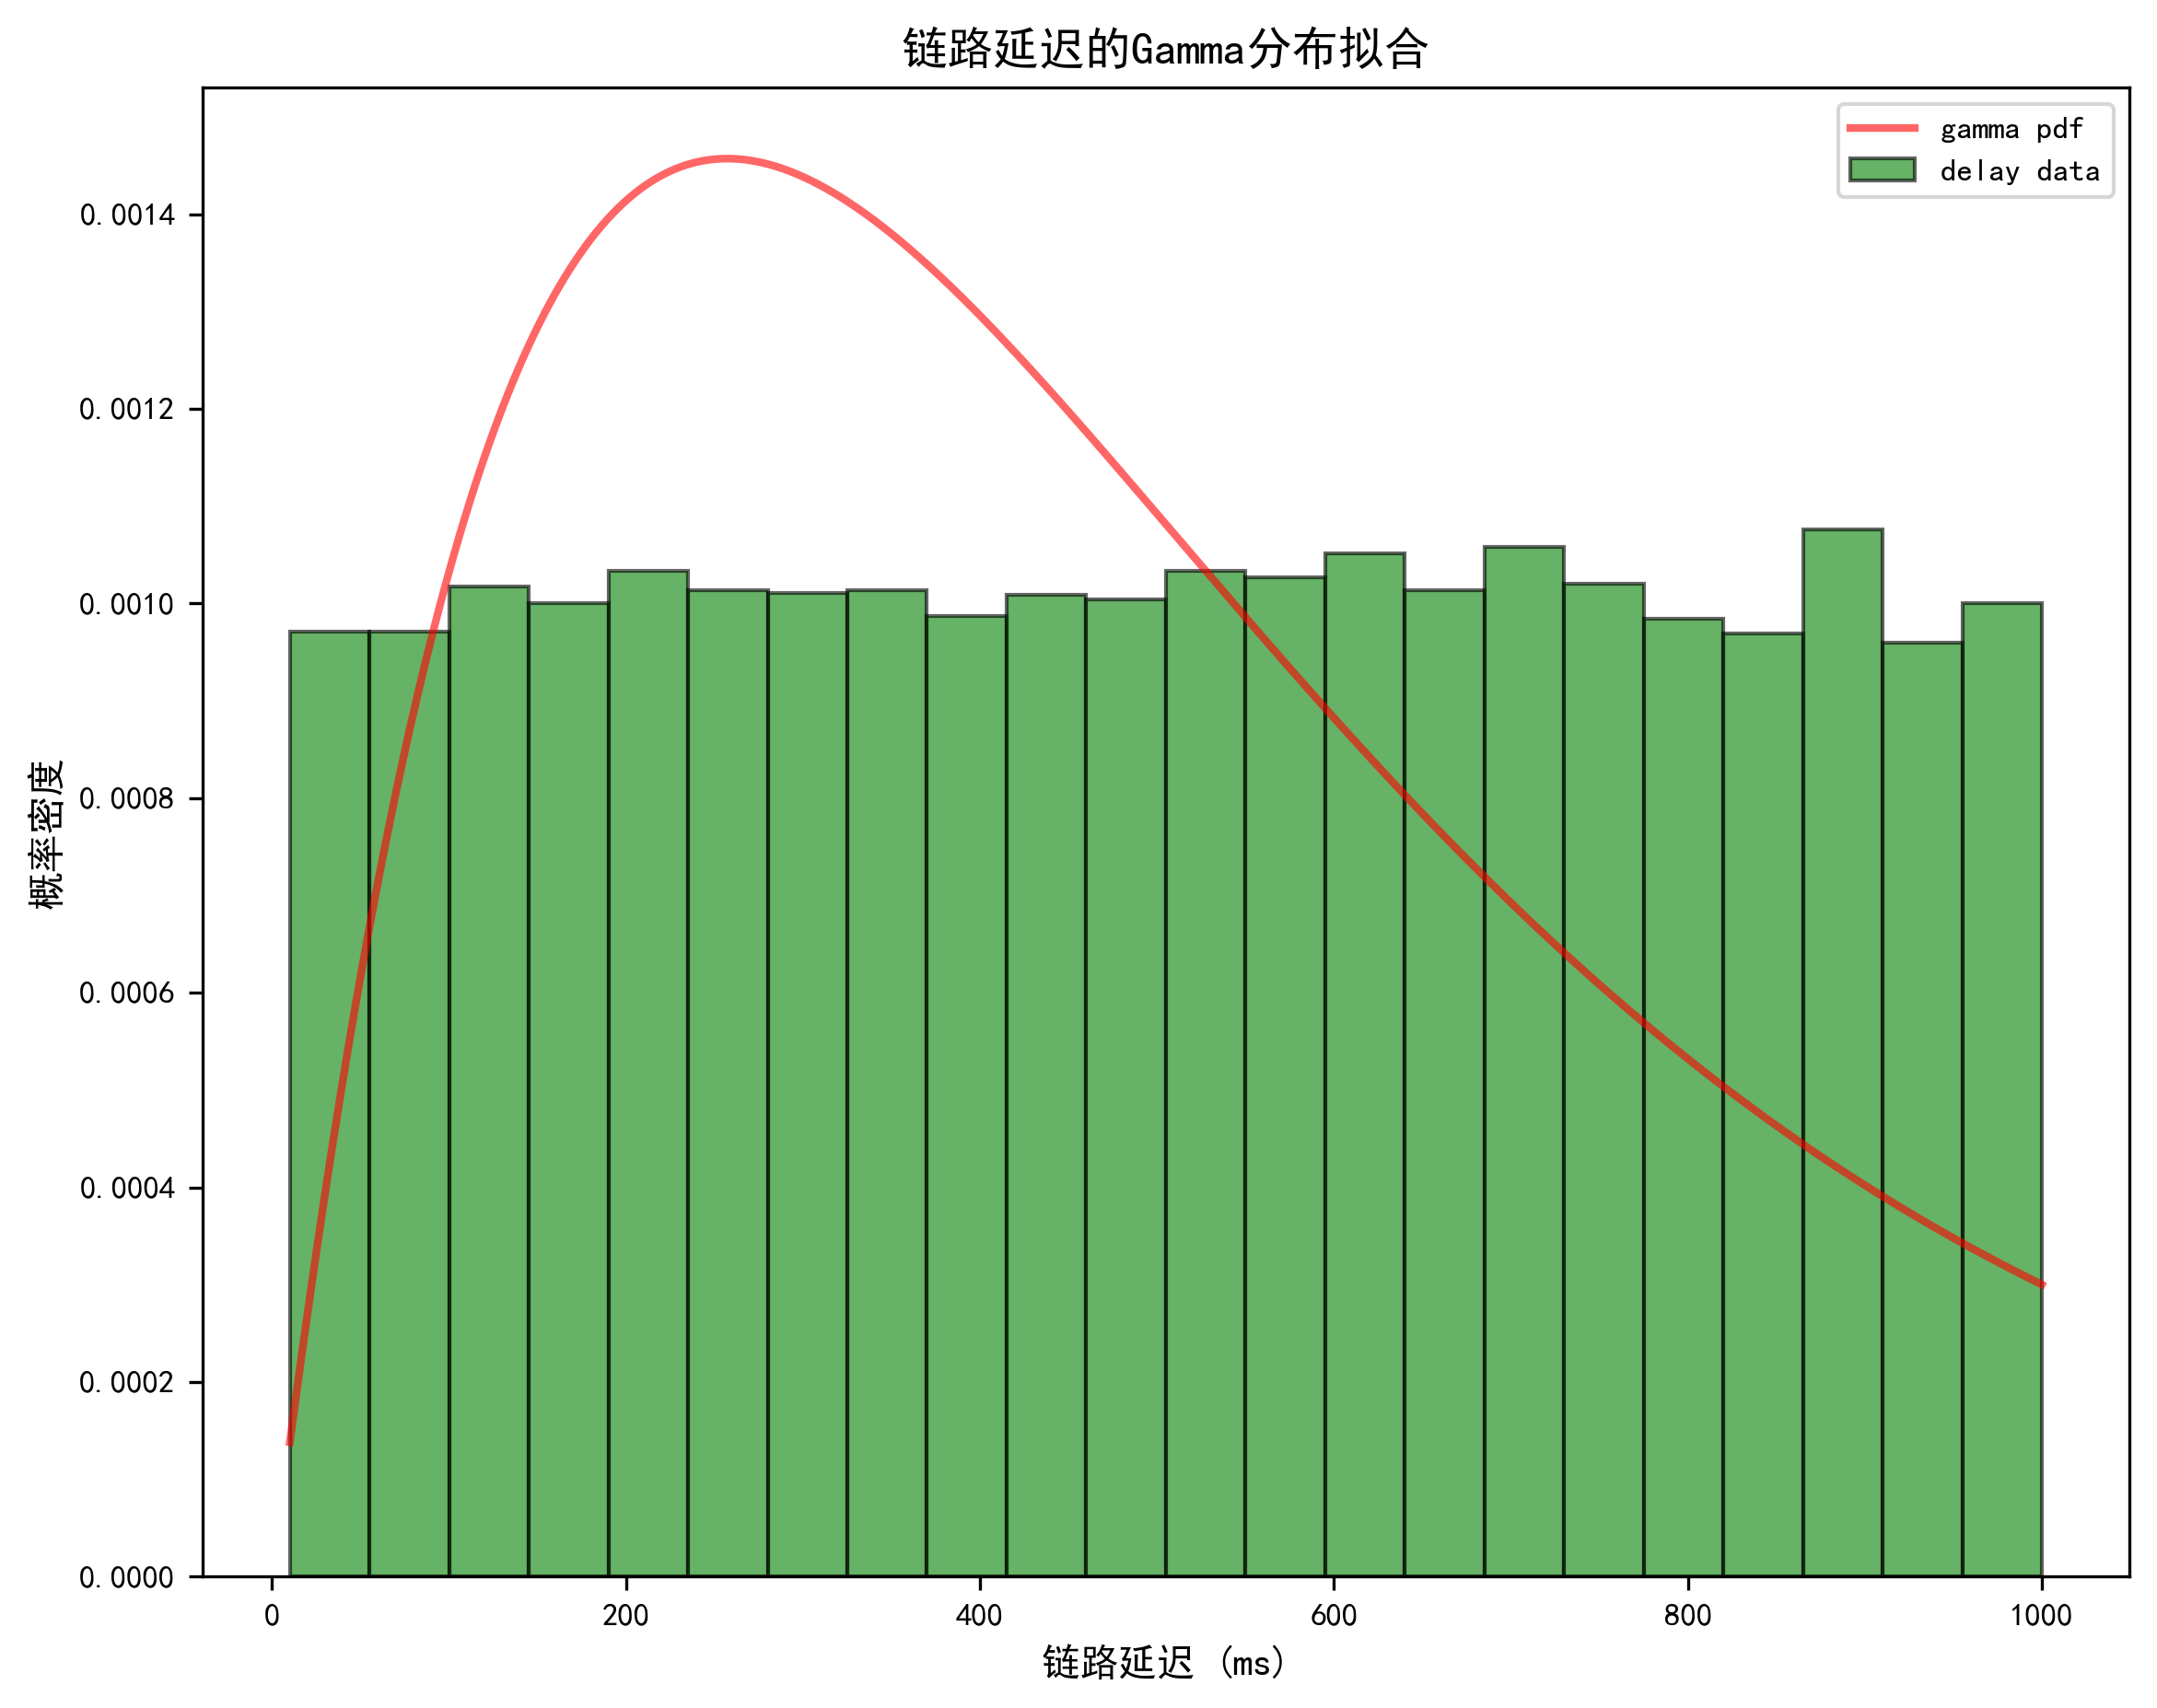

拟合后的Gamma分布参数:
形状参数 alpha: 2.0326766255259323
尺度参数 theta: 249.05469554133396


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# 生成10000个10到1000毫秒之间的随机链路延迟数据
link_delays = np.random.uniform(low=10, high=1000, size=10000)
#link_delays = gamma.rvs(7,loc=0,scale=150,size=1000)
# 使用最大似然估计来拟合Gamma分布
params = gamma.fit(link_delays, floc=0)  # floc=0 表示位置参数固定为0

# 解析拟合结果
alpha = params[0]  # 形状参数
scale = params[2]  # 尺度参数

print(f"拟合得到的形状参数 alpha: {alpha}")
print(f"拟合得到的尺度参数 theta: {scale}")

# 创建一个用于绘图的数据点范围
x = np.linspace(min(link_delays), max(link_delays), 1000)

# 绘制Gamma分布的概率密度函数
plt.plot(x, gamma.pdf(x, alpha, scale=scale), 'r-', lw=2, alpha=0.6, label='gamma pdf')

# 绘制链路延迟数据的直方图
plt.hist(link_delays, bins='auto', density=True, alpha=0.6,color='g', edgecolor='black', label='delay data')

# 设置图表标题和标签
plt.title('链路延迟的Gamma分布拟合')
plt.xlabel('链路延迟 (ms)')
plt.ylabel('概率密度')
plt.legend(loc='best')

# 显示图表
plt.show()

# 输出拟合后的Gamma分布参数
print("拟合后的Gamma分布参数:")
print("形状参数 alpha:", alpha)
print("尺度参数 theta:", scale)

带宽利用率 0.2: 形状参数 alpha=7.2604517607420735, 尺度参数 theta=2.7546495258245263
带宽利用率 0.4: 形状参数 alpha=9.626399642525604, 尺度参数 theta=2.8567274392511135
带宽利用率 0.6: 形状参数 alpha=11.501373649748844, 尺度参数 theta=3.043114767492516
带宽利用率 0.8: 形状参数 alpha=13.010971782315808, 尺度参数 theta=3.2664739199392434


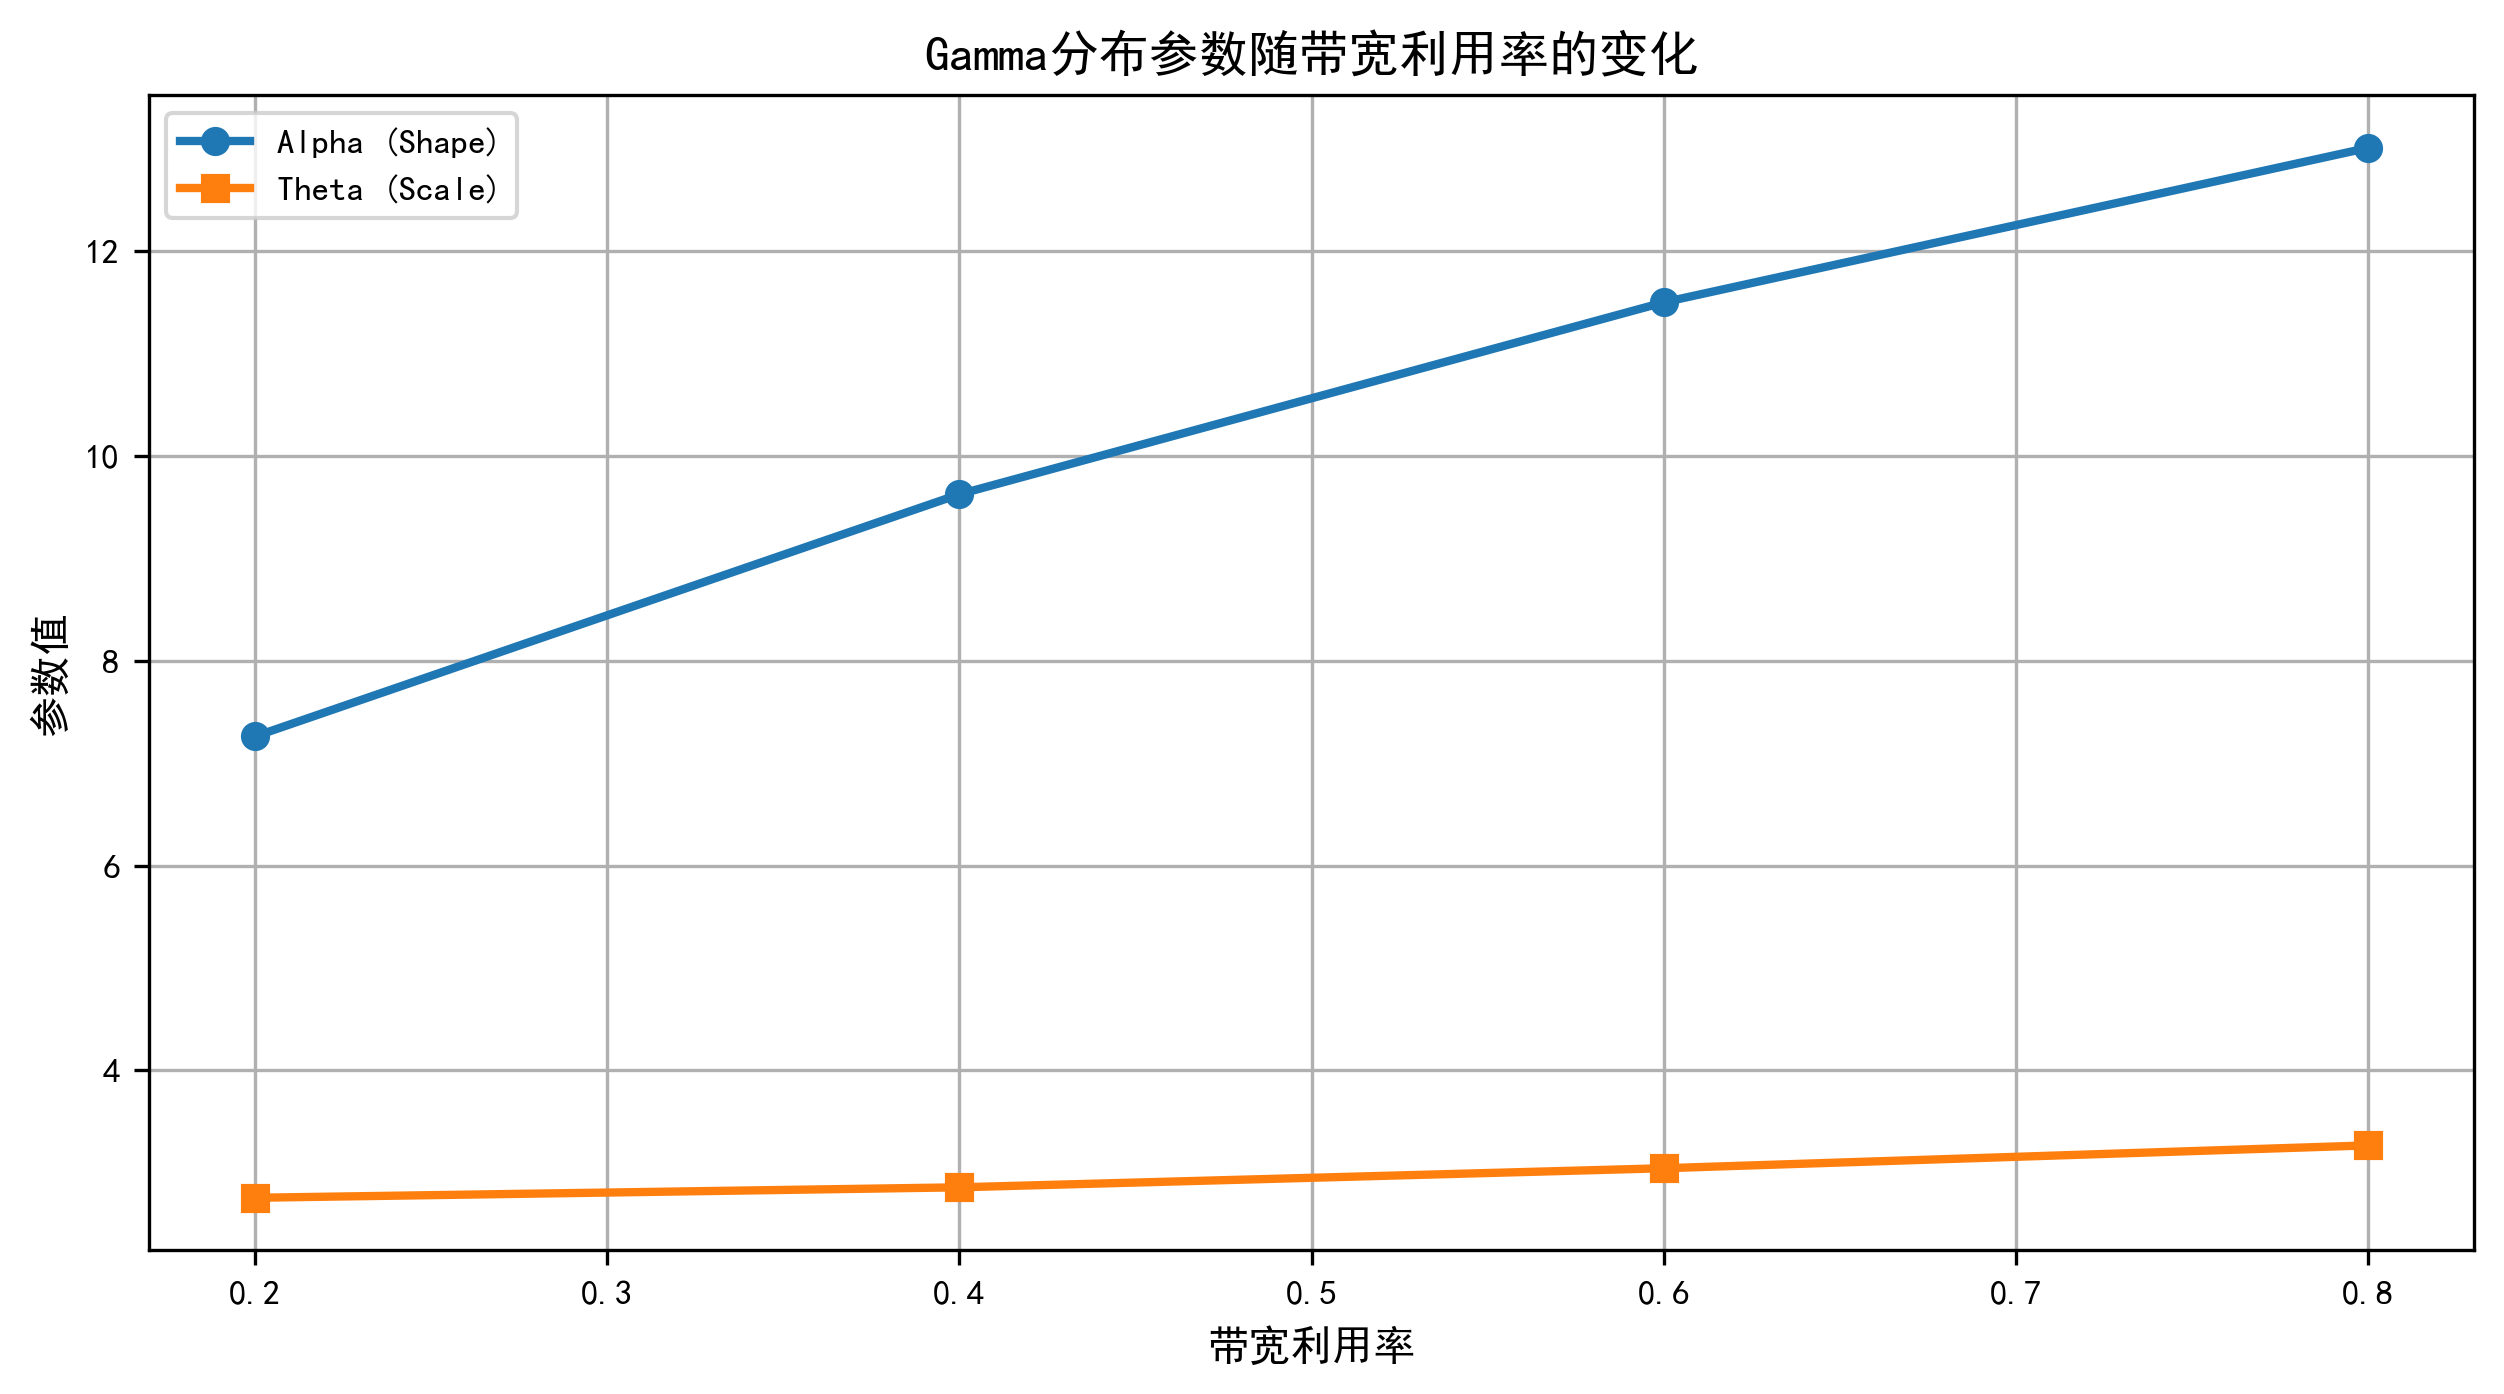

In [49]:
# 假设这是不同带宽利用率水平下的链路延迟数据
utilizations = [0.2, 0.4, 0.6, 0.8]
delays_by_utilization = {
    0.2: np.array([10, 15, 20, 25, 30]),
    0.4: np.array([15, 20, 25, 30, 35, 40]),
    0.6: np.array([20, 25, 30, 35, 40, 45, 50]),
    0.8: np.array([25, 30, 35, 40, 45, 50, 55, 60])
}

# 存储每个利用率下的拟合参数
alpha_values = []
scale_values = []

# 对每个利用率水平进行拟合
for u in utilizations:
    params = gamma.fit(delays_by_utilization[u], floc=0)
    alpha_values.append(params[0])
    scale_values.append(params[2])
    print(f"带宽利用率 {u}: 形状参数 alpha={params[0]}, 尺度参数 theta={params[2]}")

# 可视化拟合参数
plt.figure(figsize=(10, 5))
plt.plot(utilizations, alpha_values, marker='o', label='Alpha (Shape)')
plt.plot(utilizations, scale_values, marker='s', label='Theta (Scale)')
plt.title('Gamma分布参数随带宽利用率的变化')
plt.xlabel('带宽利用率')
plt.ylabel('参数值')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Q-Q图分析数据是否服从正态分布
这段代码首先生成了一组来自标准正态分布的数据点，然后计算了这些数据点的排序值（即经验分位数），并与相同数量的理论正态分位数进行了比较。最后，它绘制了一个散点图，其中x轴代表理论分位数，y轴代表样本中的实际分位数。为了便于比较，代码还添加了一条y=x的参考线。

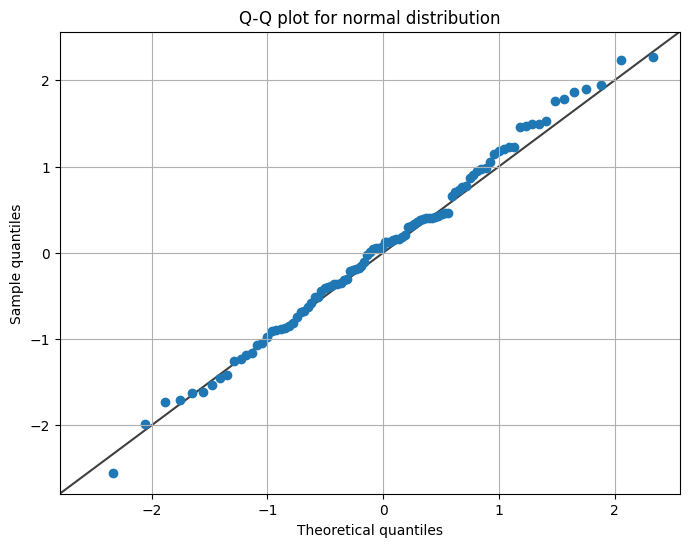

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 生成一些样本数据
np.random.seed(0)  # 设置随机种子以获得可重复的结果
sample_data = np.random.normal(loc=0, scale=1, size=100)  # 从正态分布生成100个随机数

# 计算样本数据的分位数
sample_quantiles = np.sort(sample_data)
theoretical_quantiles = stats.norm.ppf(np.arange(1, len(sample_data)+1) / (len(sample_data) + 1)) #生成数组，并归一化
#stats.norm.ppf用于计算分位点(1%,2%,3%...)对应样本值
# 绘制Q-Q图
plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles, sample_quantiles)

# 添加一条y=x线作为参考
lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlim(lims)
plt.ylim(lims)

plt.title('Q-Q plot for normal distribution')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.grid(True)
plt.show()

要使用`scipy`来拟合数据样本的密度函数，并绘制Q-Q图来判断样本是否符合正态分布，你可以按照以下步骤操作：

1. 导入必要的库。
2. 加载或生成你的数据。
3. 使用`scipy.stats`中的方法来估计数据的分布参数。
4. 绘制Q-Q图以比较数据与理论正态分布的分位数。
5. 可选地，绘制数据的概率密度函数（PDF）以可视化数据的分布情况。

下面是一个示例代码：


在这个例子中，我们首先生成了一些模拟数据`sample_data`，然后使用`stats.norm.fit`来估计这些数据的均值和标准差。接着我们使用`probplot`函数绘制了Q-Q图，这将帮助我们判断数据是否符合正态分布。最后，我们绘制了数据的直方图，并在同一图上绘制了拟合的正态分布曲线。

请注意，如果你的数据不是正态分布的，你可能需要选择其他类型的分布来拟合你的数据，并相应地调整绘图方法。此外，`probplot`函数允许你指定任何理论分布，不仅仅是正态分布。

Estimated mean: 0.059808015534485, Estimated standard deviation: 1.0078822447165796


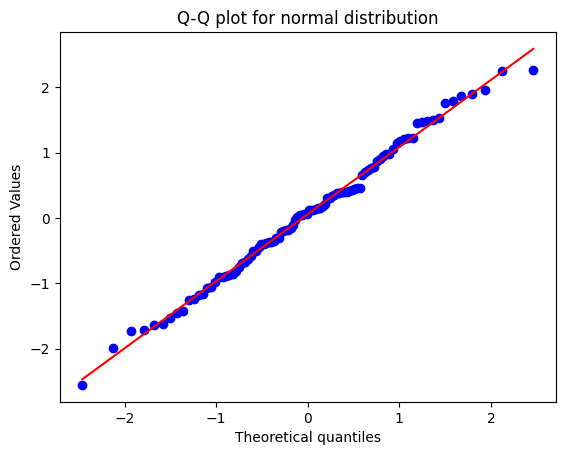

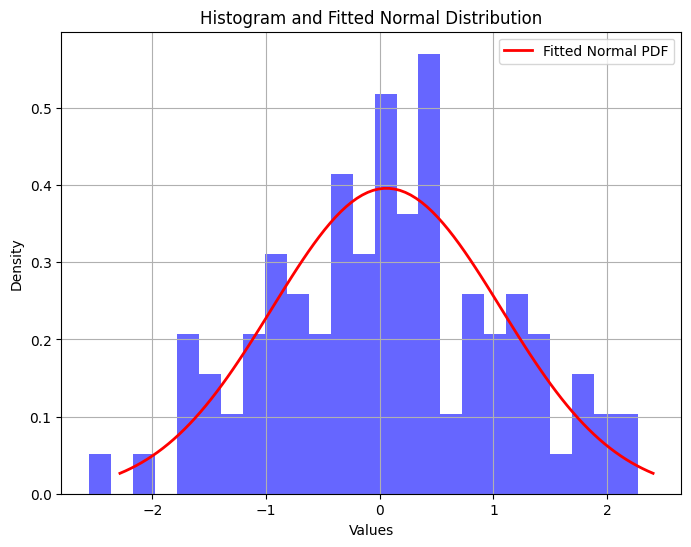

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 假设你有一个数据样本
np.random.seed(0)  # 设置随机种子以获得可重复的结果
sample_data = np.random.normal(loc=0, scale=1, size=100)  # 从正态分布生成100个随机数

# 使用最大似然估计法估计正态分布的参数
mu, std = stats.norm.fit(sample_data)

print(f"Estimated mean: {mu}, Estimated standard deviation: {std}")

# 绘制Q-Q图
stats.probplot(sample_data, dist="norm", plot=plt)
plt.title('Q-Q plot for normal distribution')
plt.show()

# 可视化样本数据的概率密度函数
x = np.linspace(stats.norm.ppf(0.01, loc=mu, scale=std), 
                stats.norm.ppf(0.99, loc=mu, scale=std), 100)
pdf_fitted = stats.norm.pdf(x, loc=mu, scale=std)

plt.figure(figsize=(8, 6))
plt.hist(sample_data, bins=25, density=True, alpha=0.6, color='b')
plt.plot(x, pdf_fitted, 'r-', lw=2, label='Fitted Normal PDF')
plt.title('Histogram and Fitted Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend(loc='best')
plt.grid(True)
plt.show()

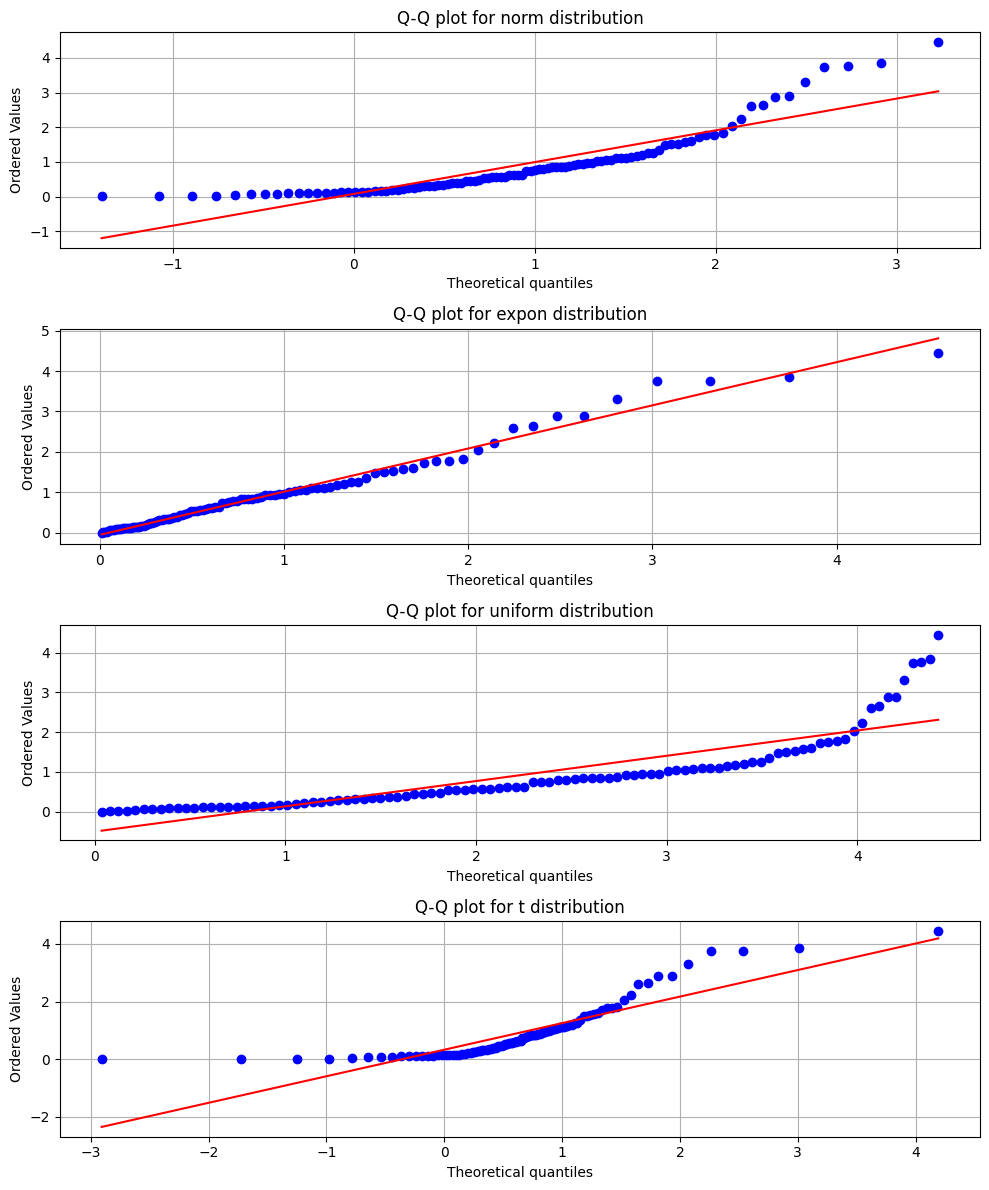

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 假设你有一系列数据样本
np.random.seed(0)  # 设置随机种子以获得可重复的结果
sample_data = np.random.exponential(scale=1.0, size=100)  # 从指数分布生成100个随机数

# 定义要尝试拟合的分布
distributions = [stats.norm, stats.expon, stats.uniform, stats.t]

# 创建一个子图网格，用于绘制不同的Q-Q图
fig, ax = plt.subplots(len(distributions), 1, figsize=(10, 3 * len(distributions)))

for i, dist in enumerate(distributions):
    # 拟合分布
    params = dist.fit(sample_data)
    
    # 使用probplot函数来绘制Q-Q图
    res = stats.probplot(sample_data, dist=dist, sparams=params, plot=ax[i])
    
    # 设置子图标题
    ax[i].set_title(f'Q-Q plot for {dist.name} distribution')
    ax[i].grid(True)

plt.tight_layout()
plt.show()

D:\python\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
D:\python\Lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


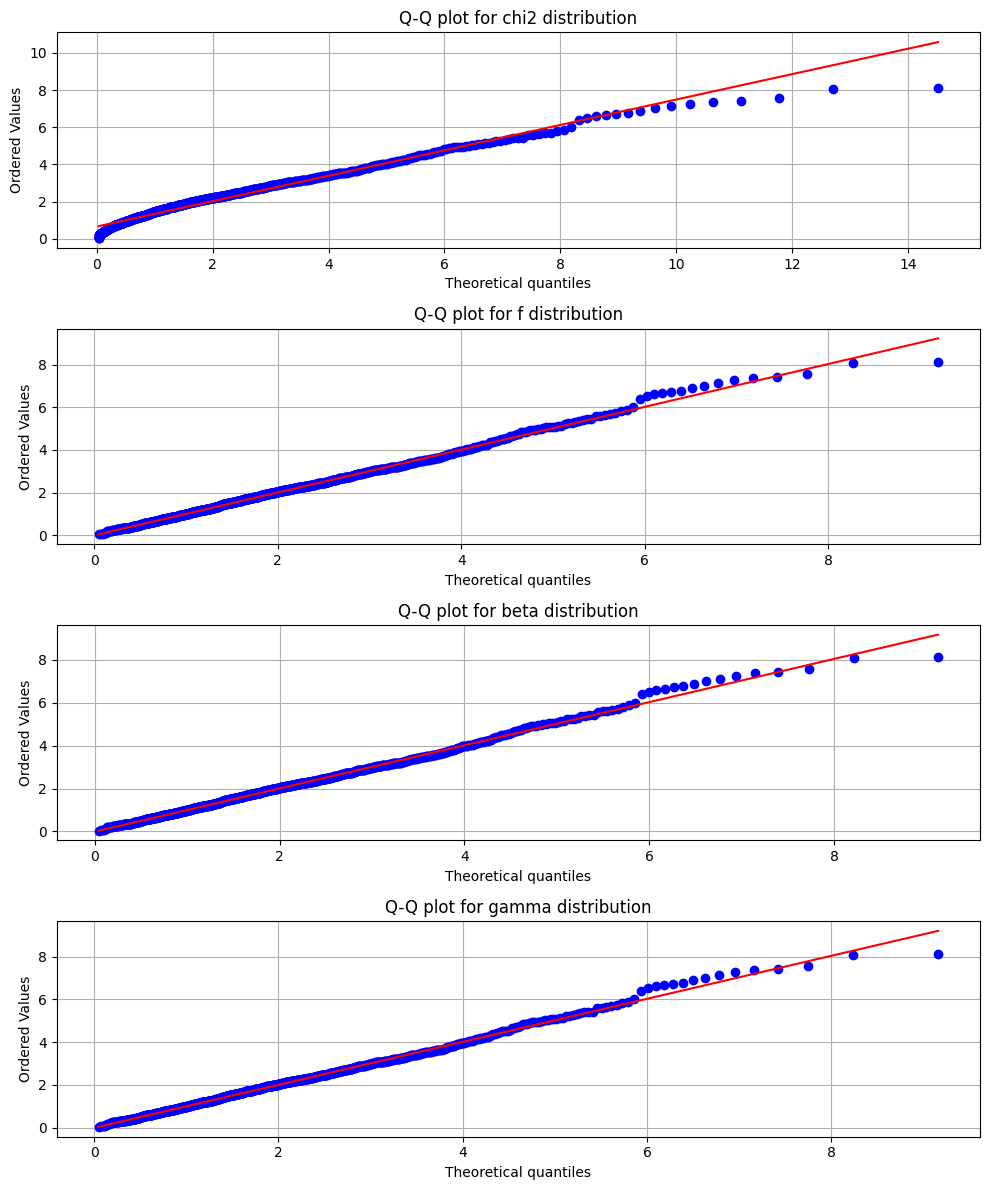

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 假设你有一系列数据样本
np.random.seed(0)  # 设置随机种子以获得可重复的结果
sample_data = np.random.gamma(shape=2, scale=1.0, size=1000)  # 从Gamma分布生成100个随机数

# 定义要尝试拟合的分布(卡方、F、Beta和Gamma)
distributions = [stats.chi2, stats.f, stats.beta, stats.gamma]

# 创建一个子图网格，用于绘制不同的Q-Q图
fig, ax = plt.subplots(len(distributions), 1, figsize=(10, 3 * len(distributions)))

for i, dist in enumerate(distributions):
    if dist == stats.beta:
        # Beta分布需要两个形状参数a和b
        params = dist.fit(sample_data, floc=0)  # 固定位置参数floc为0
    elif dist == stats.f:
        # F分布需要两个形状参数dfn（分子自由度）和dfd（分母自由度）
        params = dist.fit(sample_data)
    else:
        # 其他分布的参数估计
        params = dist.fit(sample_data)
    
    # 使用probplot函数来绘制Q-Q图
    res = stats.probplot(sample_data, dist=dist, sparams=params, plot=ax[i])
    
    # 设置子图标题
    ax[i].set_title(f'Q-Q plot for {dist.name} distribution')
    ax[i].grid(True)

plt.tight_layout()
plt.show()

D:\python\Lib\site-packages\scipy\stats\_continuous_distns.py:1680: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


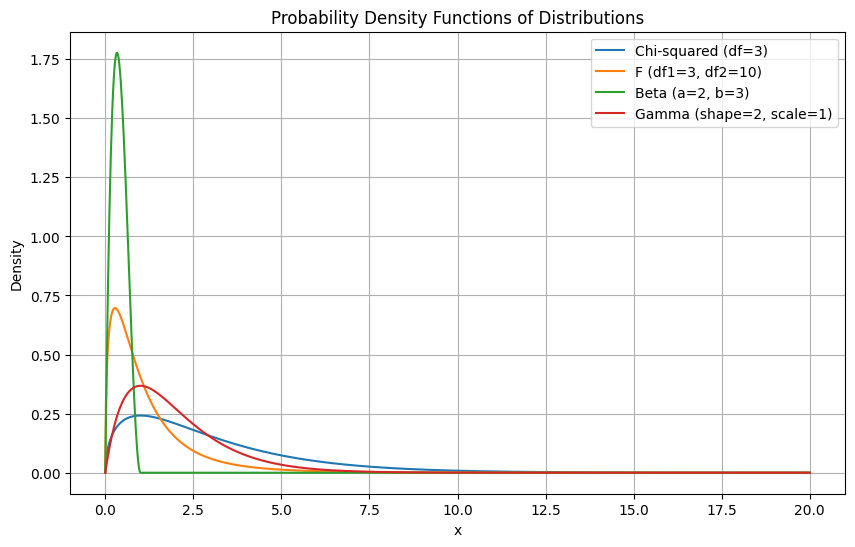

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 定义每个分布的参数
chi2_df = 3  # 卡方分布的自由度
f_df1 = 3    # F分布的分子自由度
f_df2 = 10   # F分布的分母自由度
beta_a = 2   # Beta分布的第一个形状参数
beta_b = 3   # Beta分布的第二个形状参数
gamma_shape = 2  # Gamma分布的形状参数
gamma_scale = 1  # Gamma分布的尺度参数

# 生成x轴的值范围
x = np.linspace(0, 20, 1000)

# 计算每个分布的概率密度函数值
chi2_pdf = stats.chi2.pdf(x, df=chi2_df)
f_pdf = stats.f.pdf(x, dfn=f_df1, dfd=f_df2)
beta_pdf = stats.beta.pdf(x, a=beta_a, b=beta_b)
gamma_pdf = stats.gamma.pdf(x, a=gamma_shape, scale=gamma_scale)

# 绘制每个分布的概率密度函数
plt.figure(figsize=(10, 6))

plt.plot(x, chi2_pdf, label='Chi-squared (df={})'.format(chi2_df))
plt.plot(x, f_pdf, label='F (df1={}, df2={})'.format(f_df1, f_df2))
plt.plot(x, beta_pdf, label='Beta (a={}, b={})'.format(beta_a, beta_b))
plt.plot(x, gamma_pdf, label='Gamma (shape={}, scale={})'.format(gamma_shape, gamma_scale))

plt.title('Probability Density Functions of Distributions')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()